# Intro to Statistics for Data Science

![Picture title](image-20221127-222652.png)

# Descriptive statistics

## Data types

The data is categorized in two main groups

- `categorical` data: `ordinals` and `nominals`
- `numerical` data: `discrete` and `continuous`

*the following dataset contains all the data types*

In [1]:
import pandas as pd

df = pd.read_csv("cars.csv")

df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### data types in pandas

we can get the data types of each column with df.dtypes

In [2]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

Here we will see the data types and they are identified in the following manner:

* Categorical: `object`, `bool`
* Numerical: `int64` (discrete), `float64` (contínuous)

### .describe()

.describe() will show the main statistics for the datasets

In [3]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## Measures of central tendency

![Picture title](image-20221127-225711.png)

### Mean

In [4]:
df['price_usd'].mean()

6639.971021255613

### Median

In [5]:
df['price_usd'].median()

4800.0

## Analyzing data distribution

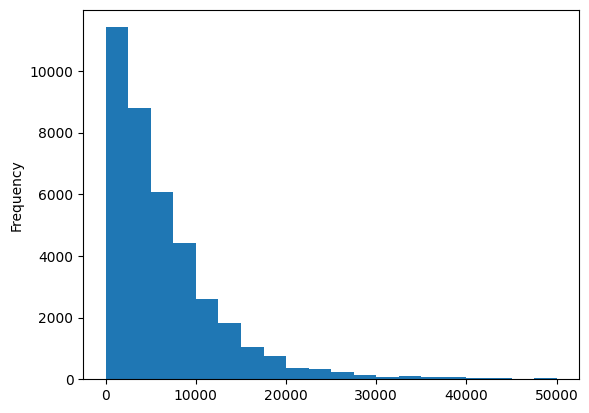

In [6]:
df["price_usd"].plot.hist(bins=20);

Here you can see data concentration

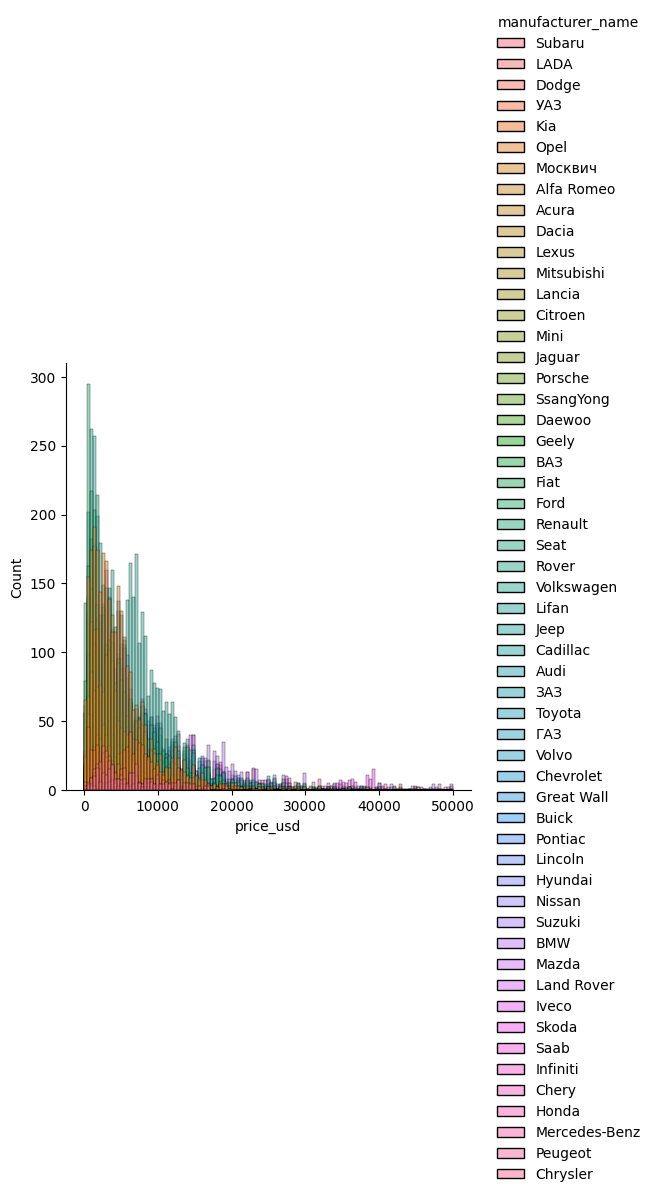

In [7]:
import seaborn as sns

sns.displot(data = df, x = "price_usd", hue = "manufacturer_name");

Now, this chart is overloaded. You can't clearly say the frequency of each brand. Let's choose a column with less categories

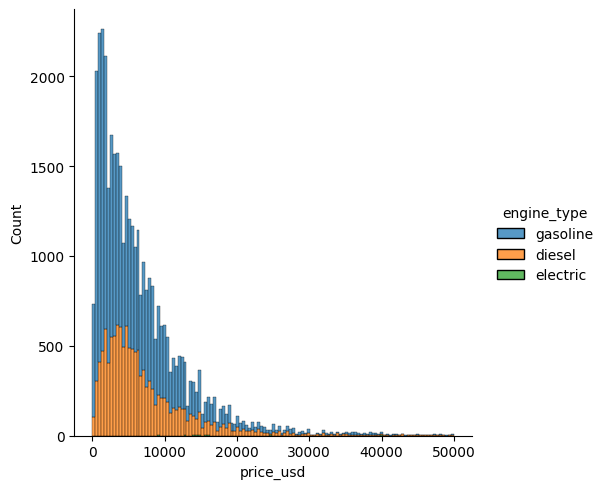

In [8]:
sns.displot(data = df, x="price_usd", hue= "engine_type", multiple = "stack");

What happened with electric cars? why aren't those visible? let's dig further

In [9]:
df.groupby("engine_type").count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


Previous DF told us that there are just 10 electric cars, but it still is too hard to analyze, where are the electric cars?

In [10]:
Electric_Cars = df[(df["engine_type"]=="electric")]

Electric_Cars

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,57


## Measures of dispersion

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cars.csv")

print(df.head(5))

  manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True

### Standard deviation

let's calculate the standart deviation of the column "price_usd"

In [12]:
df["price_usd"].std()

6428.1520182029035

### Range - (min, max values)

In [13]:
pricerange = df["price_usd"].max() - df["price_usd"].min()

print(pricerange)

49999.0


### Quartiles

In [14]:
median = df["price_usd"].median()
Q1 = df["price_usd"].quantile(q=0.25)
Q3 = df["price_usd"].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)
print("min val:", min_val, ", Quartile1:", Q1, ", Median:" ,median, ", Quartile3" ,Q3, ", max val" , max_val)

min val: 1.0 , Quartile1: 2100.0 , Median: 4800.0 , Quartile3 8990.0 , max val 50000.0


## Outliers detection

Data that is not between $$[Q_1 -1.5IQR$$ , $$Q_3 + 1.5IQR]$$ are considered outliers

In [15]:
iqr = Q3 - Q1

#left limit
minlimit = Q1 - 1.5*iqr
#right limit
maxlimit = Q3 + 1.5*iqr

print("range for outliers detection is:", minlimit, ",", maxlimit)

range for outliers detection is: -8235.0 , 19325.0


[Text(0.5, 0, '')]

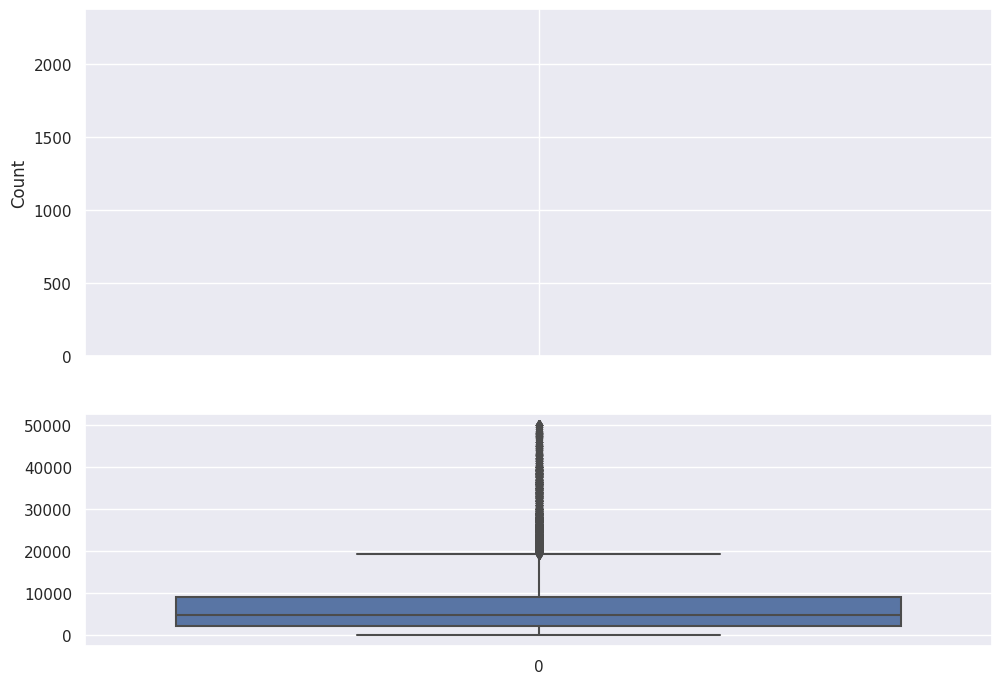

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

## Scatterplots for data analysis

In [17]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatterplot segmented by categories

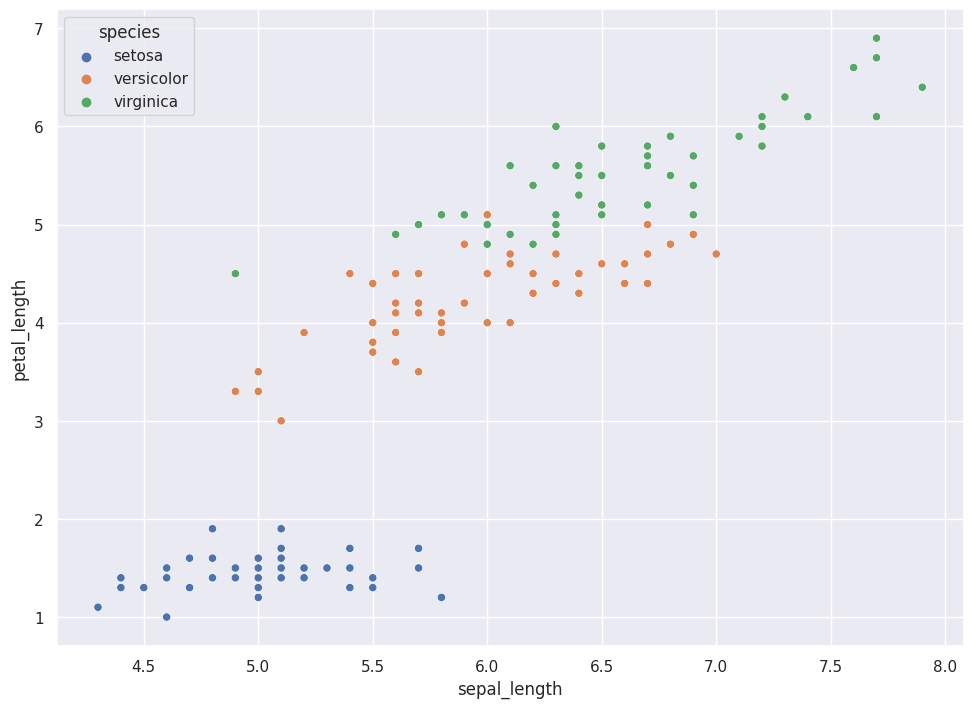

In [18]:
sns.scatterplot(data=iris, x="sepal_length", y="petal_length", hue="species");

### Jointplot

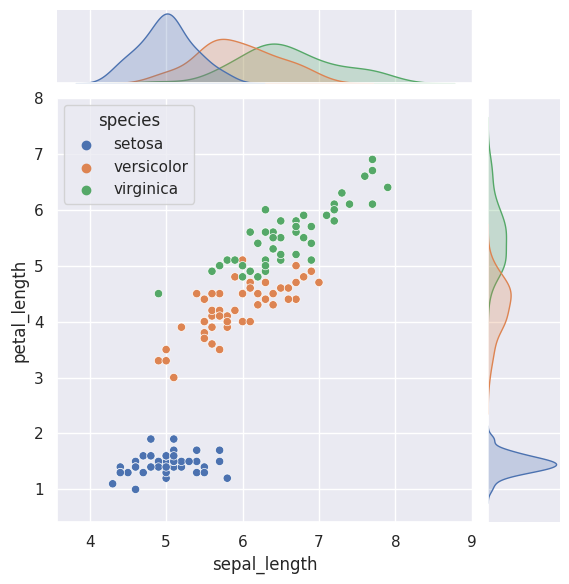

In [19]:
sns.jointplot(data=iris, x="sepal_length", y="petal_length", hue="species")

### lm plot per categories

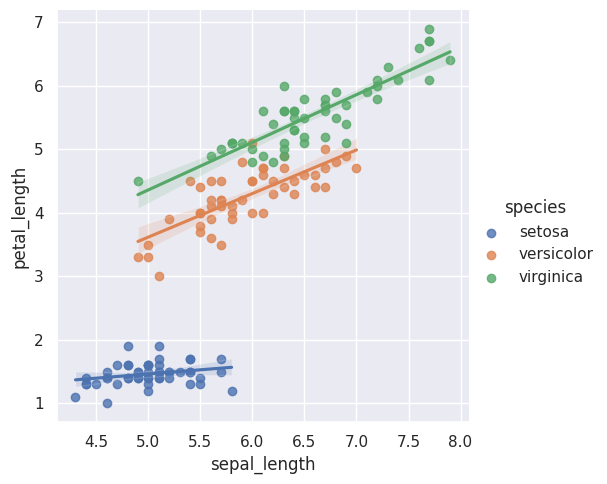

In [20]:
sns.lmplot(data=iris, x="sepal_length", y="petal_length", hue="species");

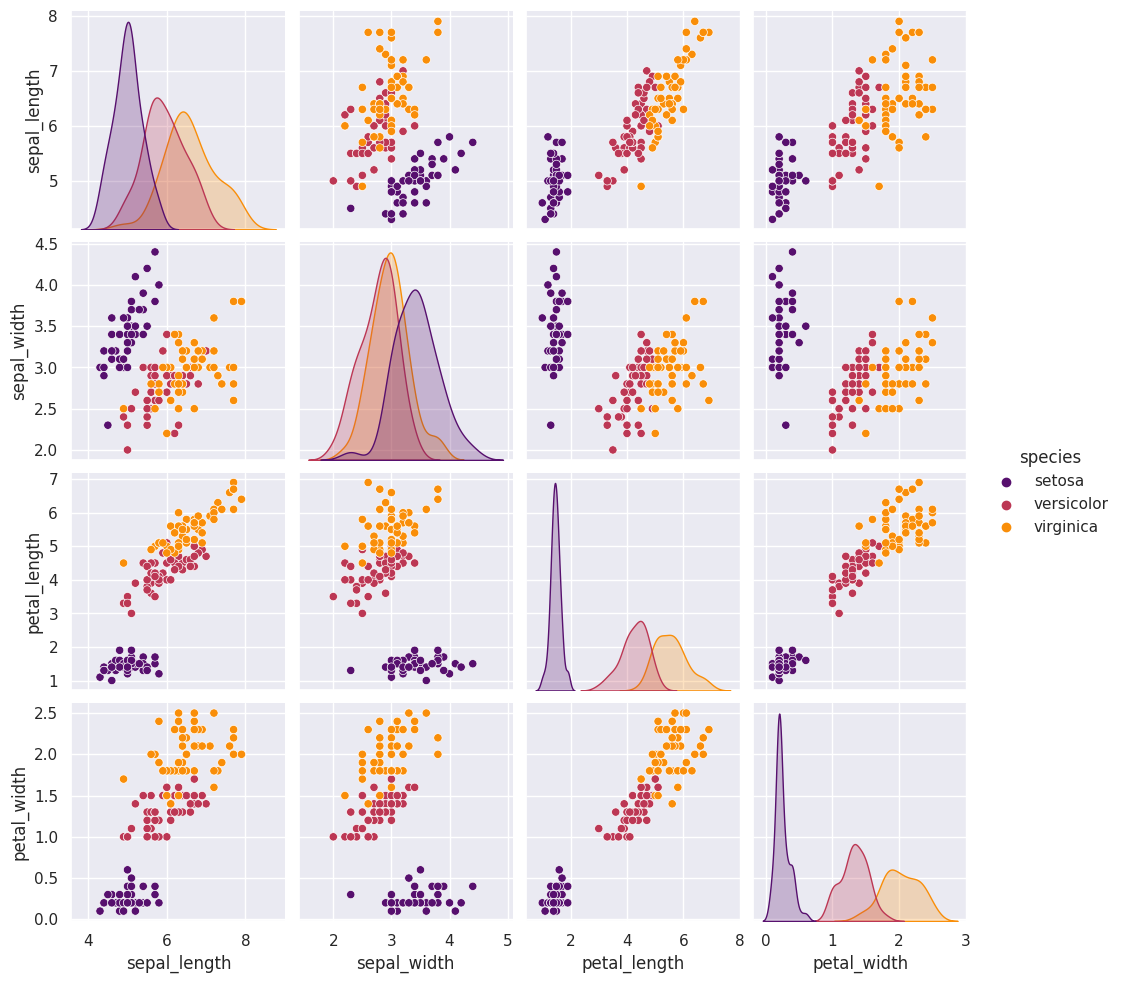

In [21]:
sns.pairplot(data=iris, hue="species", palette="inferno", diag_kind="kde");

# Pipelines de procesamiento (Variables numéricas)

this chapter will focus on data processing. The data must meet some requirements to be used as an input to a machine learning model

## Escalamiento lineal (Normalizacion)

El escalamiento lineal (o normalización) es necesario debido a que *los modelos de machine learning son eficientes en la medida que todos los datos tengan la misma escala*.

***ejemplo***
No se debe introducir en un modelo de Machine Learning:
- una variable con valores entre [**-1, 1**] 
- otra variable entre [**1.000.000, 10.000.000**]

La diferencia de las escalas es computacionalmente insostenible.

Tipicamente los modelos de machine learning son eficientes en el rango de [**-1, 1**]. *No todos*

Dicho esto, si tus datos no estan en ese rango, debes transformalos para que si esten.

<img src="image-20221203-110627.png" alt="drawing" style="width:400px;"/>

## cuando normalizar?

Cuando los datos tienen una **distribucion Normal** o **distribucion Uniforme**.

En otras palabras, cuando los datos estan uniformemente distribuidos *mas o menos* o cuando tienen una distribucion simetrica

## Tipos de normalizacion

OJO!!!

Estas transformaciones se aplican a variables con:
- **distribucion normal** 
- **distribucion uniforme**

Existen distintas formas de normalizar datos, a continuacion se explican

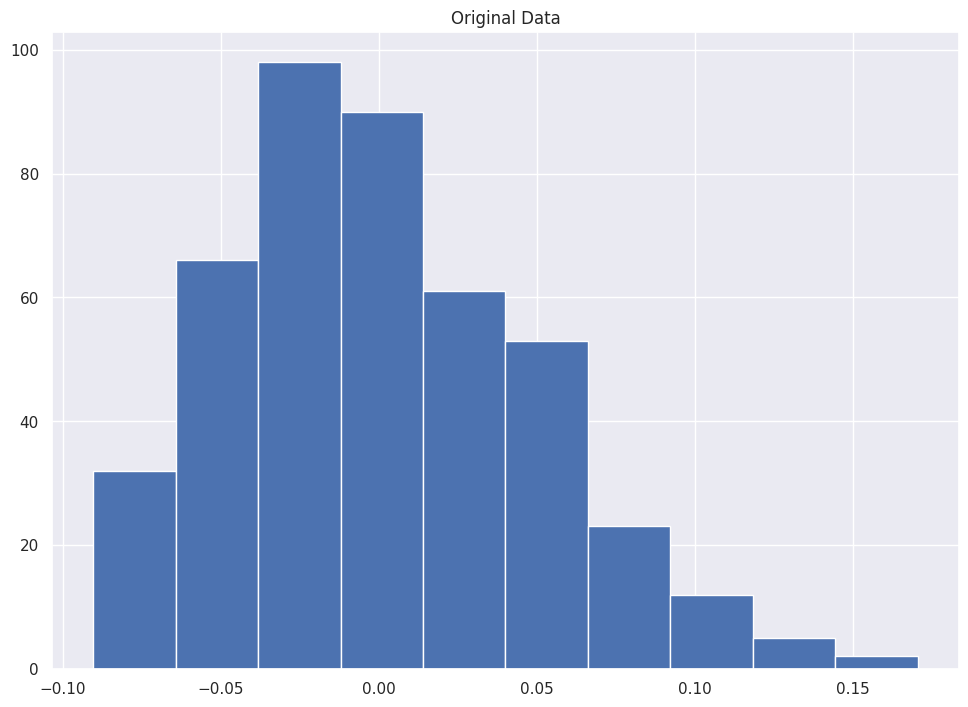

In [22]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

#se importan los datos para trabajar
X, y = datasets.load_diabetes(return_X_y=True)

#subset de X, se selecciona la tercera columna
raw = X[:, None, 2]

plt.hist(raw)
plt.title("Original Data");

Explicacion de la transformación: raw = X[:, None, 2]

X tiene un shape de (442, 10) se quiere tener solo una columna -> shape (442, 1)

- **:** toma todas las columnas y filas.
- **None** indica la transformación del arreglo (newaxis)
- **2** Selecciona la 3ra columna de X.

### Normalizacion max-min

#### max - min entre [-1, 1]

Esta normalizacion transforma todos los datos a un equivalente en un rango entre [-1,1]

$X_i'={\frac {2X_i-X_{max}-X_{min}}{X_{max}-X_{min}}}$

[1.]


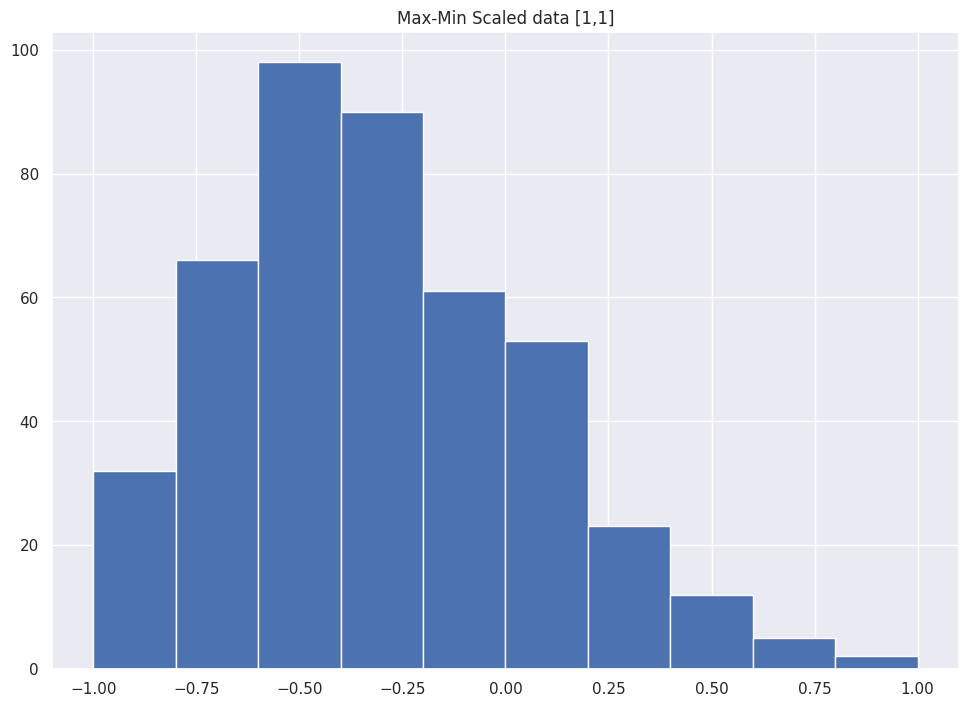

In [23]:
scaled = ( (2*raw) - min(raw) - max(raw) ) / ( max(raw) - min(raw) )

plt.hist(scaled)
plt.title("Max-Min Scaled data [1,1]");

print(max(scaled))

#### max - min entre [0, 1]

Esta normalizacion transforma todos los datos a un equivalente en un rango entre [0,1]

$X_i'={\frac {X_i-X_{min}}{X_{max}-X_{min}}}$

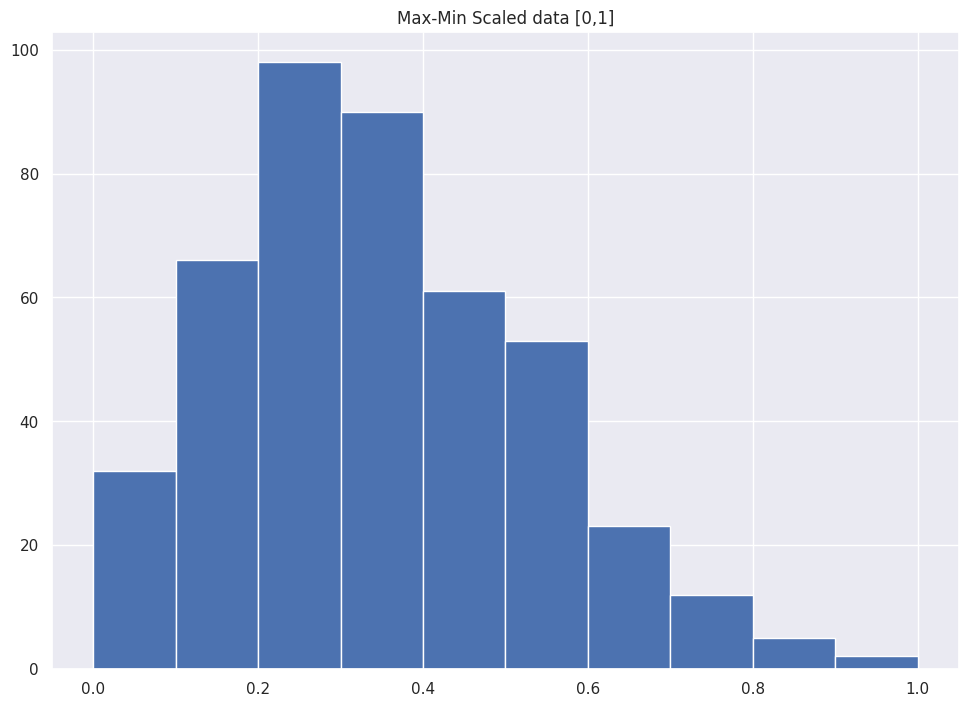

In [24]:
scaled2 = ( raw - min(raw) ) / ( max(raw) - min(raw) )

plt.hist(scaled2)
plt.title("Max-Min Scaled data [0,1]");

### Normalizacion Z-score

*Es el tipo de normalizacion mas comun*

Consiste en restarle a cada dato el promedio y dividirlo entre la desviacion estandar

$X_i'={\frac {X_i-\mu}{\sigma}}$

Esta transformacion convierte la distribucion de los datos a una normal estandar, con rango [-1, 1]

*distribucion normal estandar:*
- es una distribucion donde ($\mu$ = 0) & ($\sigma$ = 1)

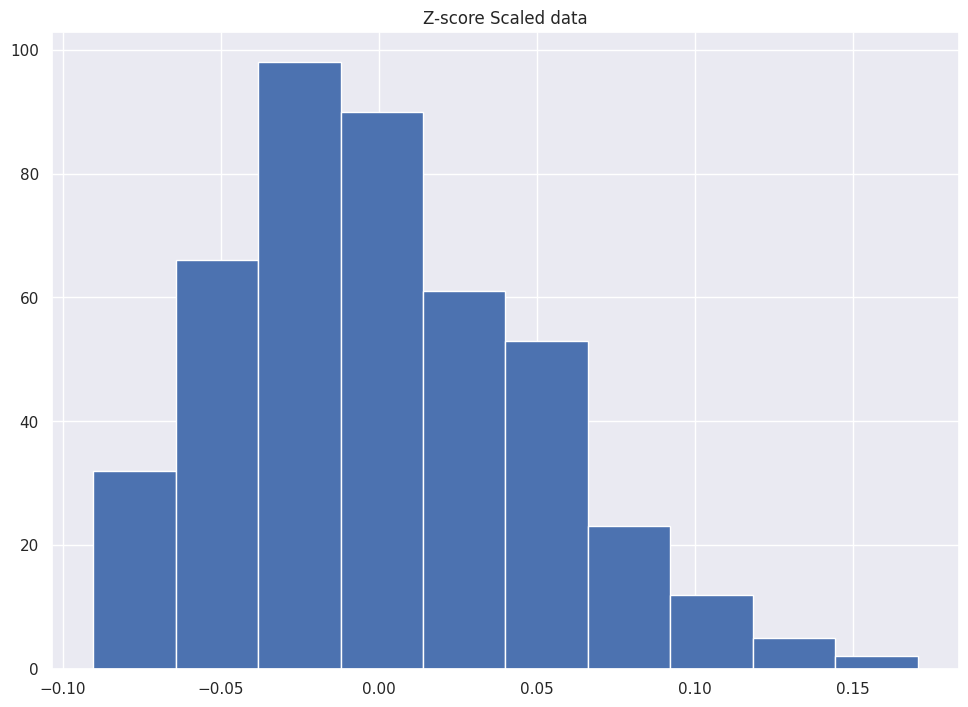

In [25]:
z_scaled = raw - np.mean(raw) / np.std(raw)

plt.hist(z_scaled)
plt.title("Z-score Scaled data");

### Clipping

*Este metodo no es el mas recomendable ya que modifica los valores originales del dataset sesgando los outliers:*

este metodo consiste en definir un intervalo, y los datos que esten por fuera del intervalo, convertirlos automaticamente al valor mas cercano del intervalo.

Ejemplo

Suponga que el intervalo se define entre [-2, 4]

- si el registro es menor que -2, automaticamente se convierte en -2
- si el registro es mayor que 4, automaticamente se converte en 4

![Picture title](image-20221203-114346.png)

La transformacion quedaria de la siguiente manera

![Picture title](image-20221203-114547.png)

**Como se escogen los valores minimos y maximos del intervalo?**

Para el metodo clipping, se escogen arbitrariamente o segun la necesidad de la medicion.

tambien puede hacerse con percentiles, de este modo el metodo clipping se conviete en **windzoriding**

### Verificacion de optimizacion en modelo de ML

In [26]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)


# medicion de tiempo de ejecucion de cada modelo
#number = 1000 indica al codigo que ejecute el modelo 1000 veces

raw_time = timeit.timeit(train_raw, number = 1000)  
scaled_time = timeit.timeit(train_raw, number = 1000)
z_scaled_time = timeit.timeit(train_raw, number = 1000)
print('training time for raw data:', raw_time)
print('training time for scaled data :', scaled_time)
print('training time for z_scaled data :', z_scaled_time)

training time for raw data: 0.31784545499976957
training time for scaled data : 0.30864152000140166
training time for z_scaled data : 0.3117789160023676


## Normalizacion en datos asimetricos (no normales)

Cuando se tienen datos con cualquier distribucion no normal, se procede asi:
1. se les aplica una transformacion para volverlos normales. 
2. se aplica escalamiento lineal.


<img src="image-20221203-121920.png" alt="drawing" style="width:400px;"/>

#### cuales son los tipos de transformaciones?

Todas las funciones matematicas no lineales (logaritmos, sigmoides, polinomios de grado 2+) son funciones no lineales que se le pueden aplicar a los datos para buscar darle simetria a la distribucion.

### ejemplo transformacion: tangente hiperbolica

*supongamos que tenemos unos datos sesgados a la izquierda tal como a continuacion:*

<img src="image-20221203-123001.png" alt="drawing" style="width:300px;"/>


*una transformacion sugerida, es una tangente hiperbolica:*

<img src="image-20221203-122821.png" alt="drawing" style="width:600px;"/>

*Notese del grafico de la derecha que:*
- *Por cada delta en los datos cercanos a cero, el rango en la funcion transformada es mas amplio.*
- *Para datos mucho mayores que cero, el rango es mas estrecho.*

**Lo dicho anteriormente se refleja en la distribucion transformada (linea morada) de la siguiente manera:**

<img src="image-20221203-123225.png" alt="drawing" style="width:300px;"/>

*si aun no se logra una distribucion lo suficientemente simetrica, se introduce un parametro "**a**"*, tal que:

$y = tanh({\frac {x}{a}})$

*El parametro **a** modifica la deformacion de la funcion $y = tanh({\frac {x}{a}})$, de esta manera se puede cambiar la distribucion de los datos despues de la transformacion.*



*las lineas morada, roja y mostaza son distintos valores de a, con lo cual la funcion cambia su forma*

<img src="image-20221203-123958.png" alt="drawing" style="width:500px;"/>

Ejemplo:

El dataset cars.csv contiene la variable **price_usd**,que esta fuertemente sesgada a la izquierda.

0    10900.00
1     5000.00
2     2800.00
3     9999.00
4     2134.11
Name: price_usd, dtype: float64


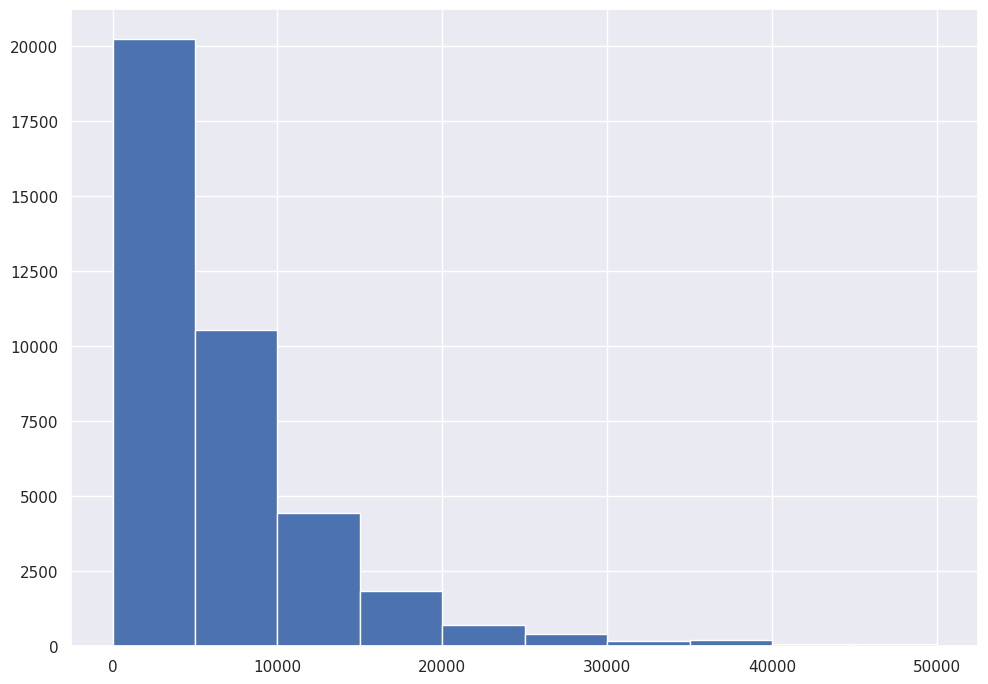

In [27]:
df = pd.read_csv('cars.csv')

#mostrando los datos
price = df.price_usd
print(price.head())

#histograma para ver distribucion
plt.hist(price);

ahora, le aplicaremos una transformacion de tangente hiperbolica para darle simetria o uniformidad:

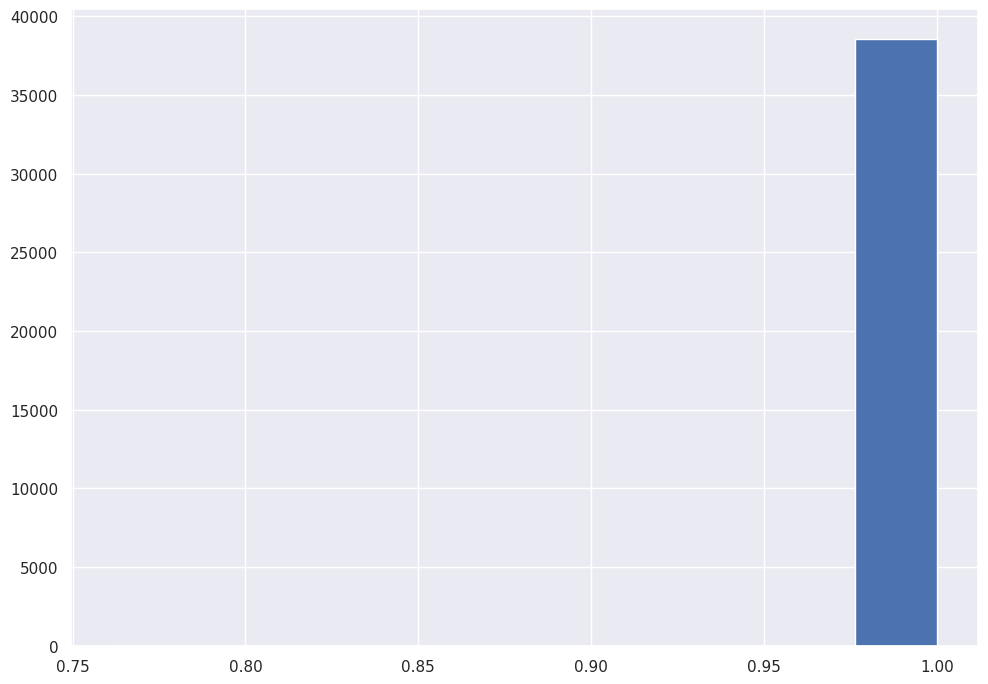

In [28]:
#transformacion
x_s = np.tanh(price)

plt.hist(x_s);

la funcion ha comprimido todos los registros en un rango muy estrecho, entonces se usa el parametro **a** para arreglar esto

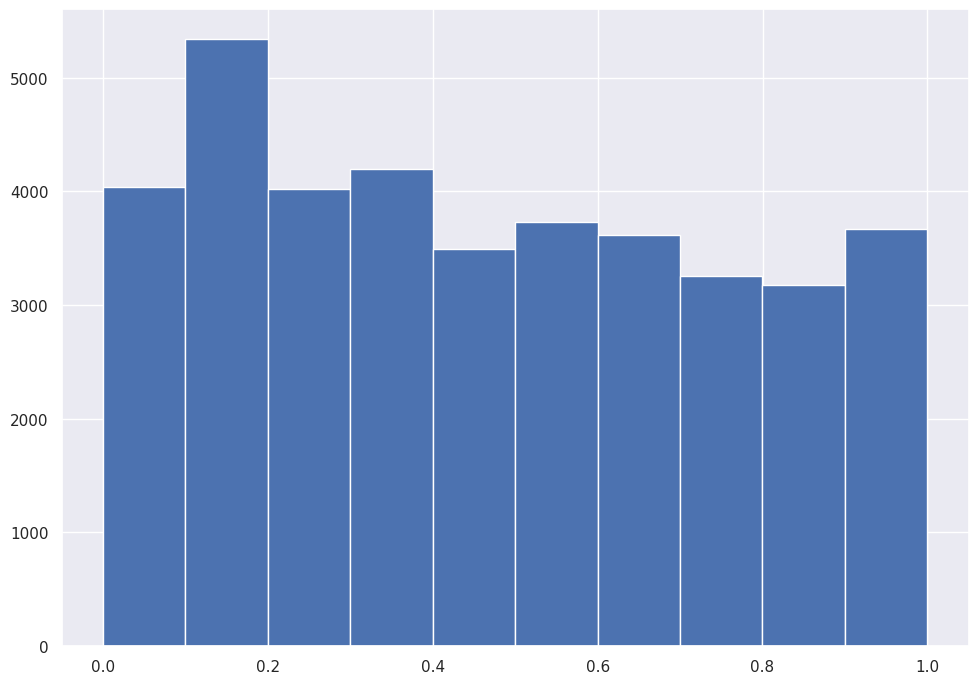

In [29]:
#transformacion2
a = 10000

x_s_adj = np.tanh(price/a)

plt.hist(x_s_adj);

### ejemplo transformacion: raiz cuadrada

suponiendo que se tienen unos datos con una distribucion como la siguiente:

<img src="image-20221203-124350.png" alt="drawing" style="width:300px;"/>

*una transformacion sugerida, es una raiz cuadrada:*

<img src="image-20221203-130642.png" alt="drawing" style="width:600px;"/>

*Notese del grafico de la derecha que:*
- *Por cada delta en los datos cercanos a cero, el rango en la funcion transformada es mas amplio.*
- *Para datos mucho mayores que cero, el rango es mas estrecho.*

**Lo dicho anteriormente se refleja en la distribucion transformada (linea morada) de la siguiente manera:**

<img src="image-20221203-130830.png" alt="drawing" style="width:300px;"/>

la funcion raiz cuadrada se puede expresar de manera polinomial, y hay un abanico infinito de exponentes que puedes usar para transformar los datos a una distribucion mas simetrica

# Pipelines de procesamiento (Variables categoricas)

<img src="image-20221203-193053.png" alt="drawing" style="width:400px;"/>

## Comparativa entre Dummy & One-hot

<img src="image-20221203-193253.png" alt="drawing" style="width:400px;"/>

Conceptualmente son diferentes, pero el metodo **dummy no esta implementado en las librerias que se explican a continuacion**. En cambio, se utiliza el metodo one-hot

## Creacion de variables tipo one-hot

In [30]:
import pandas as pd

df = pd.read_csv('cars.csv')

#se usa la columna engine type, cuyos valores son (diesel, electric, gasoline)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


### Pandas one-hot

In [31]:
# a pesar de que dice get_dummies, realmente esta haciendo one-hot
pd.get_dummies(df["engine_type"])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


### One-hot con scikit-learn

In [32]:
import sklearn.preprocessing as preprocessing

#encoder = metodo de codificacion de variables categoricas
#handle_unknown = codifica las variables desconocidas como un vector de ceros
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [33]:
#ajustando el encoder a las categorias de mi dataset
#(se le pasa la lista de valores sobre los cuales crea las categorias)

encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [34]:
# aceite es una categoria random para ver como codifica una variable que no existe
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

*Note que las categorias que no existen se codifican como [0, 0, 0, ..., 0]*

**Que pasa si se hace con variables numericas discretas?**

### One hot con variable numerica discreta

In [35]:
# se ajusta el encoder a las categorias (en este caso cada categoria es un año)
encoder.fit(df[["year_produced"]].values)

OneHotEncoder(handle_unknown='ignore')

In [36]:
# se intenta con un año inexistente para probar la codificacion:
encoder.transform([[2016],[2009],[3050]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Aqui se evidencia una desventaja del one-hot. Dado que hay muchas variables categoricas, el dataset se hace inmenso y no es deseable para terminos de performance en nuestro modelo

# Correlaciones

## pairplot()

Una manera de ver las correlaciones entre todas las variables en un analisis exploratorio de datos es mediante el pairplot:

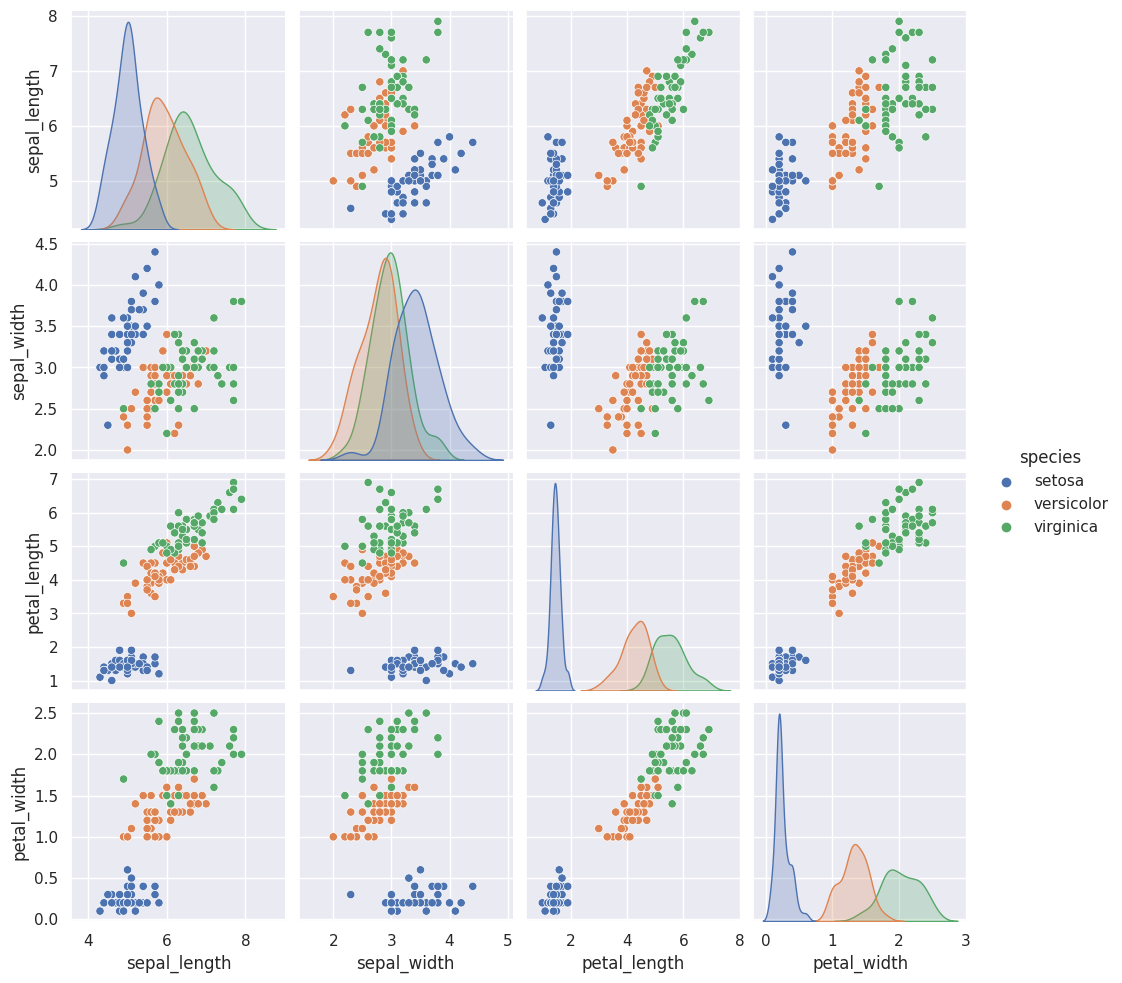

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

#datos para trabajar
iris = sns.load_dataset('iris')

#grafico para identificar correlaciones
sns.pairplot(iris, hue = 'species');

## Covarianza

Sea la covarianza entre dos variables:

<img src="image-20221203-213233.png" alt="drawing" style="width:400px;"/>

## Coeficiente de correlacion

Entonces el **coeficiente de correlacion** (de pearson) se calcula de la siguiente manera:

<img src="image-20221203-213348.png" alt="drawing" style="width:300px;"/>

este valor se encuentra entre [-1, 1]

- si $\rho \approx 1$, hay correlacion directa
- si $\rho \approx -1$, hay correlacion inversa
- si $\rho \approx 0$, no hay correlacion

ejemplo de correlacion entre dos variables:

<img src="image-20221203-213831.png" alt="drawing" style="width:600px;"/>

### Ejemplo: Matriz de covarianzas

Para este ejemplo, se hallan las covarianzas entre las variables numericas del dataset iris:

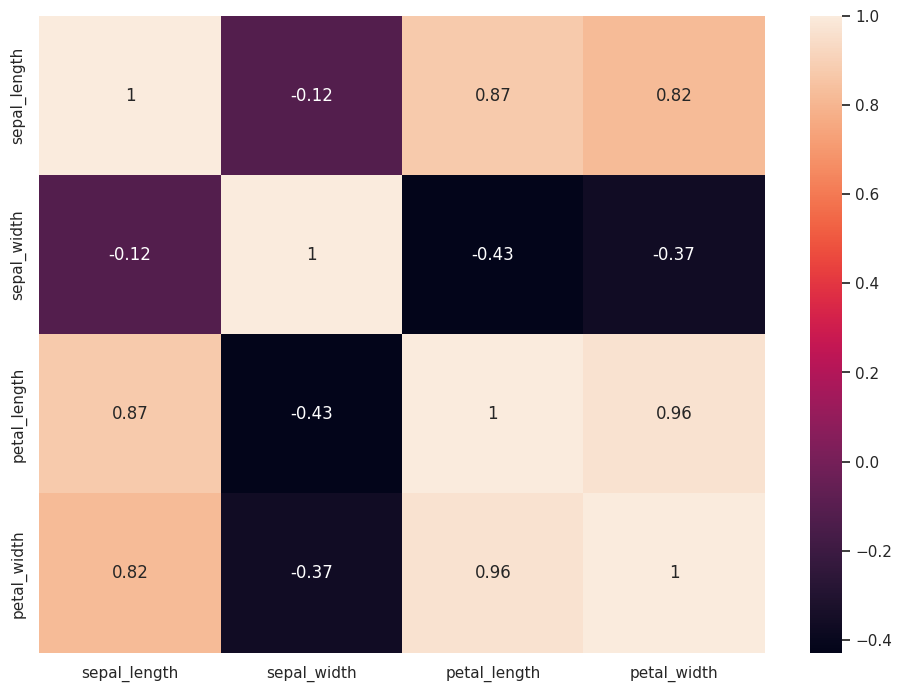

In [38]:
sns.heatmap(iris.corr(), annot=True);

# Valores propios

En álgebra lineal podemos tener ecuaciones donde la incógnita es un vector, supongamos la siguiente ecuación:

<img src="image-20221203-215951.png" alt="drawing" style="width:200px;"/>

- A es una matriz cuadrada NxN con elementos conocidos
- $\overrightarrow{x}$ es un vector columna cuyas componentes desconocemos

Entonces, lo que esta ecuación nos pregunta es:

**¿Existen vectores $\overrightarrow{x}$ tales que al multiplicarlos por la matriz A eso sea equivalente a simplemente multiplicarlos por un número?**

Si tal vector existe y está asociado a un valor específico de $\lambda$ entonces:
- El vector $\overrightarrow{x}$ es un vector propio de la matriz A
- $\lambda$ es su valor propio correspondiente.

### ejemplo para matriz 2x2

*Consideremos una matriz 2 x 2*



<img src="image-20221203-220450.png" alt="drawing" style="width:200px;"/>

*haciendo el producto matriz por vector esto se traduce a un sistema de ecuaciones:*



<img src="image-20221203-220614.png" alt="drawing" style="width:200px;"/>

*Debemos encontrar las combinaciones de **x, y** que satisfacen el sistema de ecuaciones.*

*Lo cual python resuelve de la siguiente manera:*

In [39]:
#Se crea la matriz a
A = np.array([[1,2], [1,0]])

#le pedimos los valores y vectores propios a python
values, vectors = np.linalg.eig(A)

*np.linalg.eig(A) lo que hace es calcular directamente los valores y vectores propios, llamados values y vectors en el código, respectivamente.*

*los valores $\lambda$ &darr;&darr;&darr;*

In [40]:
values

array([ 2., -1.])

*los vectores $\overrightarrow{x}$ &darr;&darr;&darr;*

In [41]:
vectors

array([[ 0.89442719, -0.70710678],
       [ 0.4472136 ,  0.70710678]])

los vectores propios que entrega **np.linalg.eig(A)** son vectores columnas, es decir:

- el vector **vectors[:, 0]**, esta asociado al valor propio $\lambda_0$
- el vector **vectors[:, 1]**, esta asociado al valor propio $\lambda_1$

y así sucesivamente.

#### Comprobacion de resultados

Comprobemos si $A*\overrightarrow{x} = \lambda*\overrightarrow{x}$


1. *para $\lambda_0$, $\overrightarrow{x}_0$*

In [42]:
np.matmul(A, vectors[:,0])

array([1.78885438, 0.89442719])

In [43]:
values[0]*vectors[:,0]

array([1.78885438, 0.89442719])

**Si son iguales** ✅✅✅

2. *para $\lambda_1$, $\overrightarrow{x}_1$*

In [44]:
np.matmul(A, vectors[:,1])

array([ 0.70710678, -0.70710678])

In [45]:
values[1]*vectors[:,1]

array([ 0.70710678, -0.70710678])

**Tambien son iguales** ✅✅✅

# Principal Component Analysis (PCA)

La matriz de covarianza puede ser descompuesta en terminos de sus vectores y valores propios:

Tal que:

- El primer termino es una matriz donde cada columna son los vectores propios correspondientes
- El segundo termino es la matriz diagonal de valores propios
- El tercer termino es una matriz donde cada Fila son los vectores propios correspondientes (por eso se transpone)



<img src="image-20221226-172258.png" alt="drawing" style="width:500px;"/>

Entonces, **las componentes principales de una matriz son cada uno de los vectores propios**

![Picture title](image-20221226-172531.png)

## Aplicando PCA a dataset iris (con vectores y valores propios)

*El objetivo identificar el minimo numero de variables necesarias para describir nuestro dataset*


In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# se importan los datos
iris = sns.load_dataset('iris')

# normalizacion Z a los datos
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

# se crea matriz de covarianza
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])


*En el grafico de correlaciones, se le presta especial cuidado a la correlacion entre las variables petal_width y petal_length*

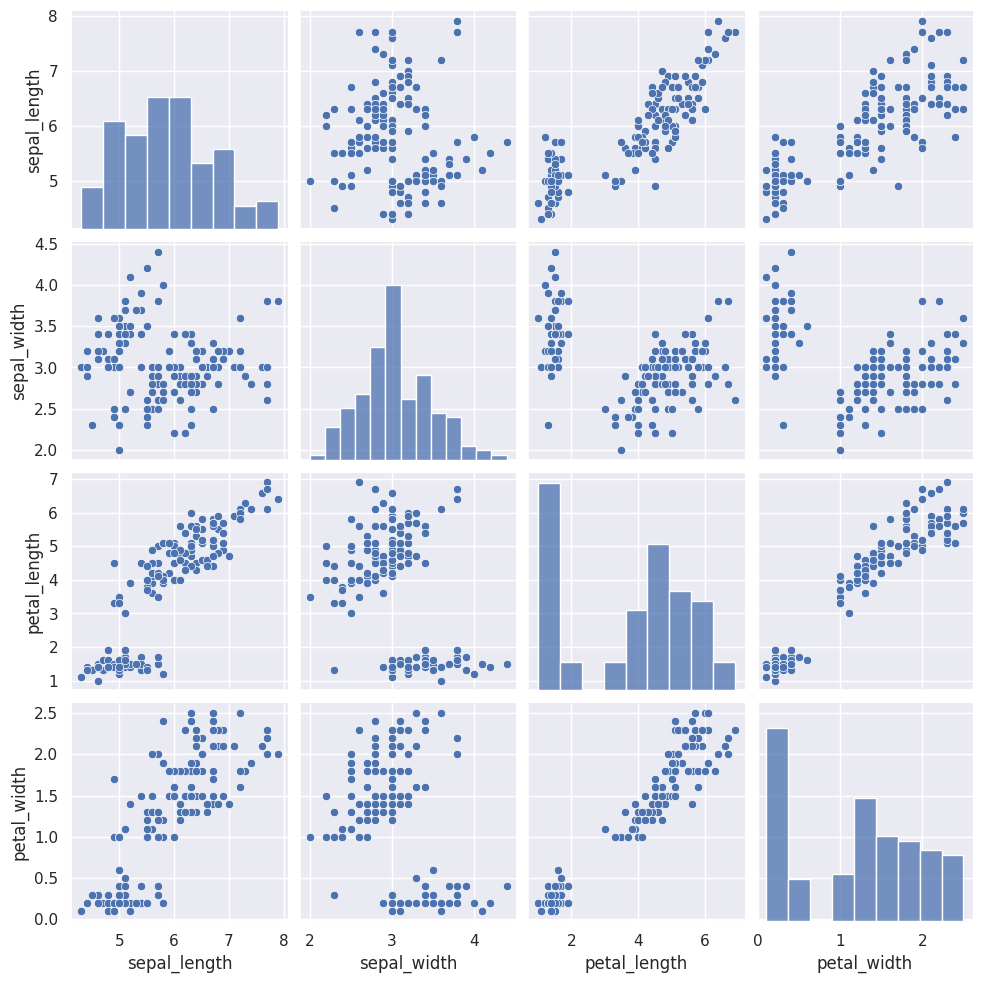

In [47]:
sns.pairplot(iris)

*Entonces hagamos un jointplot con solo esas dos variables*

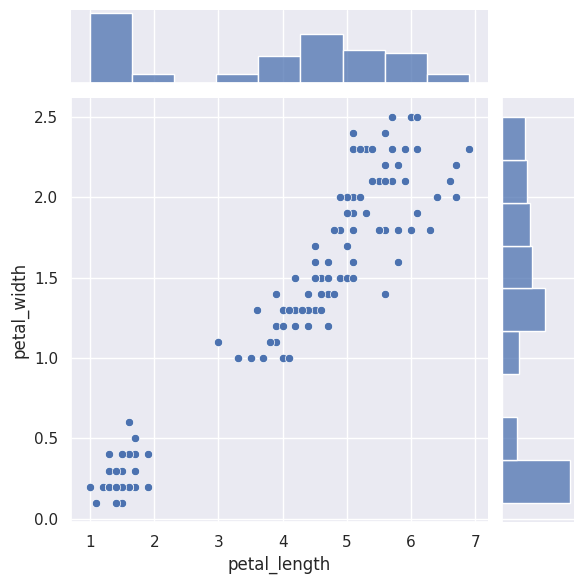

In [48]:
# Diagrama con variables originales
sns.jointplot(x=iris["petal_length"], y=iris["petal_width"])

Otro jointplot con las mismas variables (pero estandarizadas)

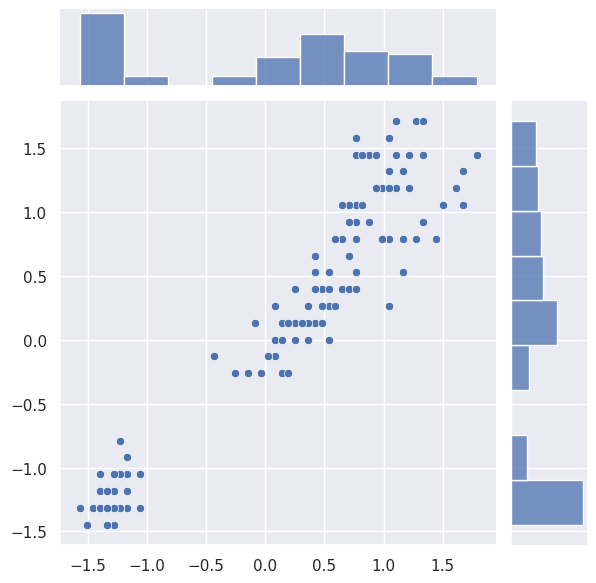

In [49]:
# Mismo diagrama con variables estandarizadas
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

***Por que estandarizamos?***

*El PCA calcula la proyeccion de los vectores considerando que los datos estan centrados, (promedio = 0 y stdev = 1)*

### Se descompone la matriz en vectores y valores propios

*Para obtener las componentes principales, y la respectiva varianza que capturan, hay que descomponer la matriz en vectores y valores propios.*

In [50]:
# Descomposicion
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

***valores propios:***

In [51]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

*cada eigen_value (o valor propio) indica el porcentaje de la varianza total de los datos que es capturada por el vector propio correspondiente*

***vectores propios:***

In [52]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

*Ahora evaluemos **que porcentaje de la varianza captura cada componente***

In [53]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


Entonces se concluye:

- El primer componente (o autovalor) captura el 72.96% de la varianza total de las cuatro dimensiones
- El segundo componente captura el 2.85% de la variable
- Los dos primeros componentes explican mas del 95% de los datos, podrian simplemente despreciarse los otros dos

*Ahora, como se transforman estos datos (que estan en cuatro dimensiones) tal que se reduzca el numero de dimensiones con base en esto?*

## Aplicando PCA a dataset iris (con numpy)

In [54]:
from sklearn.decomposition import PCA

# Indicamos que queremos quedarnos con dos componentes
pca = PCA(n_components=2)

# Se le aplica la transformacion (no al dataset original sino al escalado)
pca.fit(scaled)

PCA(n_components=2)

*Si se quiere **cuanta varianza explica cada componente**, se puede usar el siguiente metodo de PCA*

In [55]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

*Lo cual coincide con lo que hicimos manualmente ;)*

**Ahora podemos proceder a hacer la transformacion de los datos**

Entonces, al transformar el dataset original:

- Se crean nuevas variables, las cuales son combinaciones lineales de las antiguas
- Redujimos el numero de variables de 4 a 2
- estamos capturando mas del 95% de la varianza de los datos originales


In [56]:
# Se crea un nuevo conjunto de variables
reduced_scaled = pca.transform(scaled)

reduced_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

*Se anexan estas dos nuevas variables al dataset original*

In [57]:
iris["pca_1"] = scaled[:,0]
iris["pca_2"] = scaled[:,1]
#iris["pca_3"] = scaled[:,2]
#iris["pca_4"] = scaled[:,3]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.038005,-0.131979
146,6.3,2.5,5.0,1.9,virginica,0.553333,-1.282963
147,6.5,3.0,5.2,2.0,virginica,0.795669,-0.131979
148,6.2,3.4,5.4,2.3,virginica,0.432165,0.788808


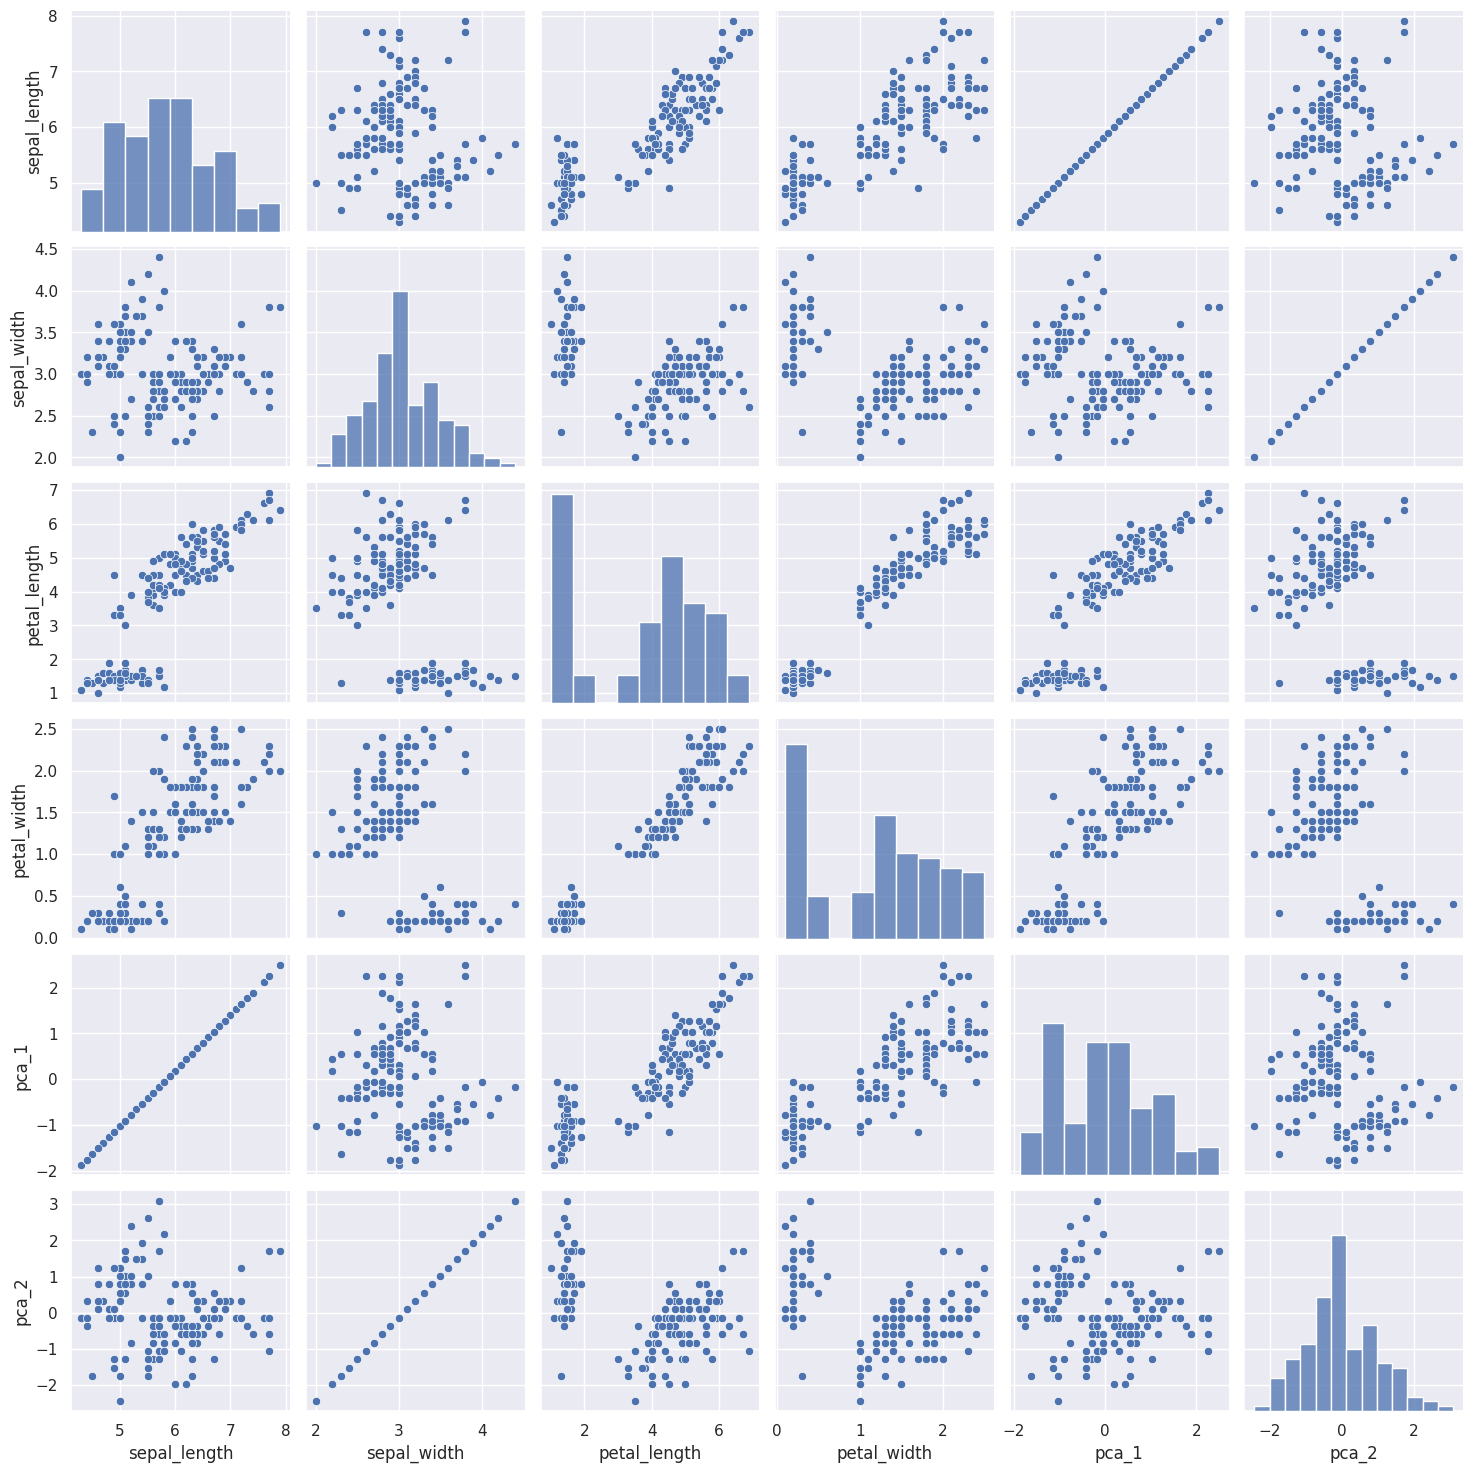

In [58]:
sns.pairplot(iris)

## Graficando el conjunto de datos reducido

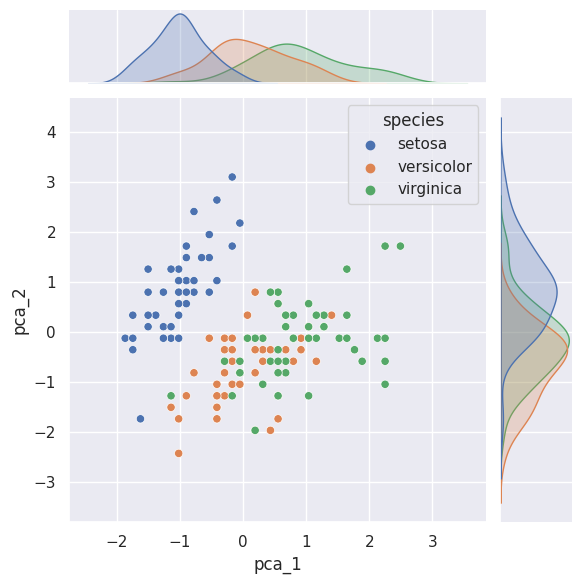

In [59]:
sns.jointplot(x = iris["pca_1"], y = iris["pca_2"], hue = iris["species"])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0493539d-2517-459e-ab02-5038a77e4110' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>